In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.animation import FuncAnimation
from scipy.stats import uniform
from observision_models import NormalObservation
from IPython.display import HTML

# Simulate ball throwing and generate Observations

In [2]:
from ball_throwing_simulator import BallThrowingSimulator

(61, 4, 1) (61, 2, 1)


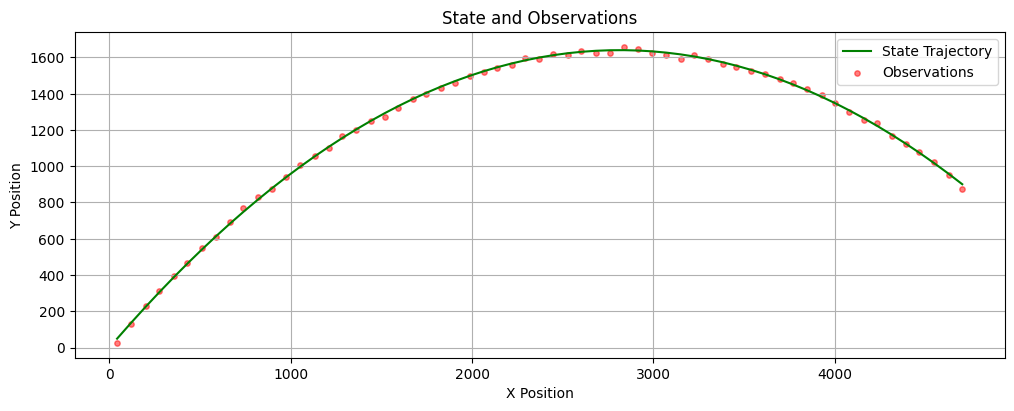

In [54]:
ball_num = 1
# init_state = np.array([[0, 0], [50,30], [100,80], [100,80]])  # Initial state: [x, y, vx, vy]
simulator = BallThrowingSimulator(delta_t=0.5, ball_num=ball_num, observation_variance=[10, 10])
# Simulate the motion and observations
states, observations = simulator.simulate(time=30)
print(states.shape, observations.shape)
# Show the simulated states and observations
fig, ax = plt.subplots(figsize=(12, 12))
plot_observations(ax, states, observations)

# Initilaize
## State
$$[X, Y, V_x, V_y]^T$$

## Uniform Random Particle Sets
$$X, Y \in [0, 3000]$$
$$V_x, V_y \in [0, 200]$$

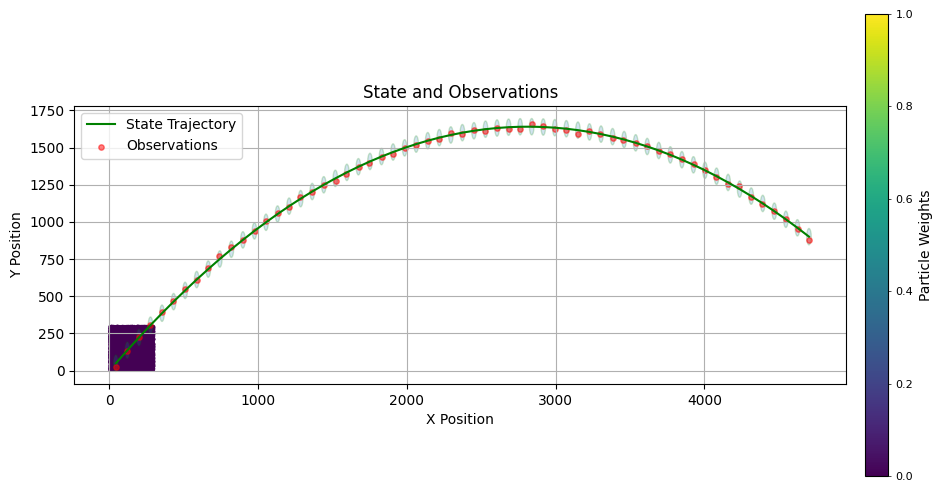

In [55]:
from partickle_filter import ParticleFilter
# initialize 1000 random particles
pf = ParticleFilter(10000)

init_particles, init_weights = pf.snaps[0]

# show initial particles
fig, ax = plt.subplots(figsize=(12, 12))
# ax.set_xlim(0, 3000)
# ax.set_ylim(0, 3000)
ax.set_title('Initial Particles')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plot_particles(ax, init_particles, init_weights)
plot_observations(ax, states, observations, NormalObservation.R)
plt.show()

Neff:9999.999999999998
weighs max:0.0001, min:0.0001, mean:0.00010000000000000005
loglikelihood max:-42.43414469565907, min-135538.96647194106, mean:-39455.01863471545
Neff:1.000000000000313
weighs max:0.9999999999998435, min:0.0, mean:9.999999999999999e-05
loglikelihood max:-11.956385169030376, min-1127.1225239859543, mean:-181.21347783453726
Neff:1.0018869381939455
weighs max:0.9990577507795301, min:0.0, mean:9.999999999999999e-05
loglikelihood max:-75.66400786544877, min-1612.4665339203518, mean:-418.4442606274218
Neff:2.113963981921916
weighs max:0.6125977403044934, min:0.0, mean:0.0001
loglikelihood max:-134.19469378817655, min-1798.666776527416, mean:-462.3006850897231
Neff:1.0922063647058786
weighs max:0.9558387289193161, min:0.0, mean:0.0001
loglikelihood max:-268.4614449293471, min-2149.9743179850493, mean:-727.1548231079033
Neff:1.9702989569241116
weighs max:0.6697929817577339, min:0.0, mean:9.999999999999999e-05
loglikelihood max:-395.14514520900406, min-1841.933196760681, m

MovieWriter imagemagick unavailable; using Pillow instead.


Neff:9999.999999999998
weighs max:0.0001, min:0.0001, mean:0.00010000000000000005
loglikelihood max:-37.0065472164539, min-129688.49614260645, mean:-39031.07176517832
Neff:1.0000000001180784
weighs max:0.9999999999409608, min:0.0, mean:0.0001
loglikelihood max:-5.109137803681612, min-1555.7931988740895, mean:-315.8927061004185
Neff:24.400798569309636
weighs max:0.07666580829408022, min:0.0, mean:9.999999999999999e-05
loglikelihood max:-6.359221170863974, min-1711.8577891273624, mean:-388.3439924906411
Neff:1.4929820185018123
weighs max:0.8083047613121978, min:0.0, mean:9.999999999999996e-05
loglikelihood max:-6.669803044661655, min-1447.4431696009315, mean:-288.44669400450044
Neff:1.2456978319157876
weighs max:0.894038309138314, min:0.0, mean:0.00010000000000000002
loglikelihood max:-16.236644650176125, min-1690.4714761743242, mean:-346.57891849473947
Neff:4.700550884613653
weighs max:0.3131495161169044, min:0.0, mean:9.999999999999996e-05
loglikelihood max:-18.047553587101433, min-156

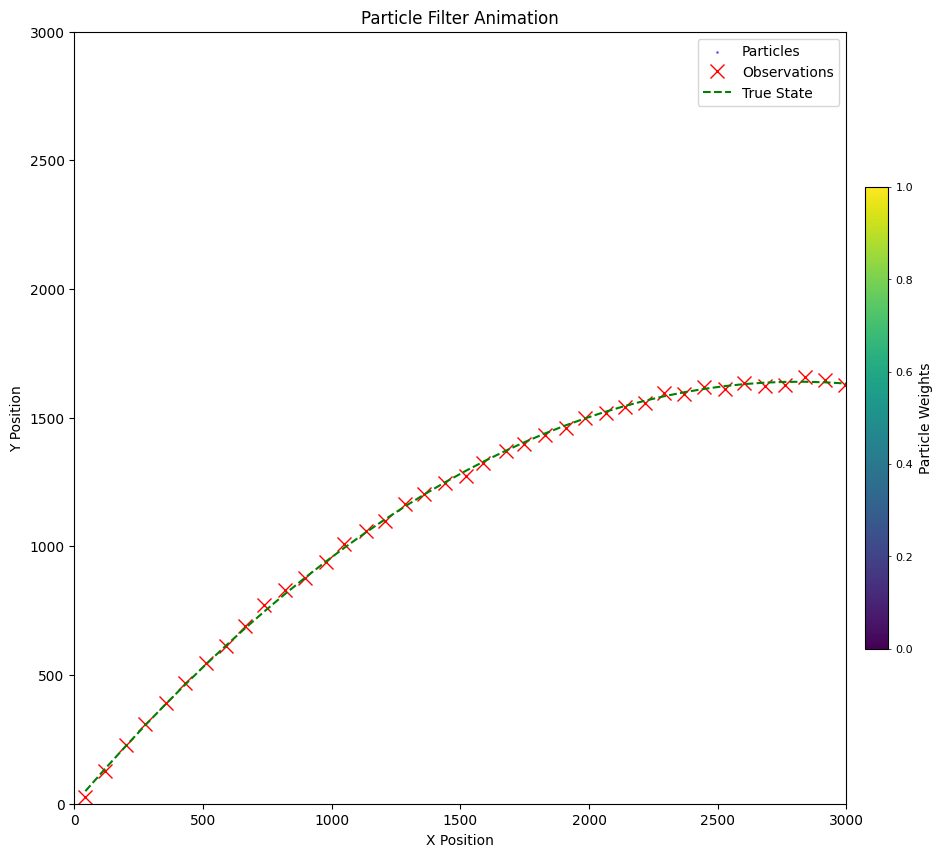

In [ ]:
# 1. 初始化图表
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(0, 3000)
ax.set_ylim(0, 3000)
ax.set_title('Particle Filter Animation')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_aspect('equal', adjustable='box') # 保持坐标轴比例一致，避免椭圆变形


# 初始化用于动画的图元
# 散点图的集合 (Collection) 用于粒子，线条用于观测和真实状态
# 注意：plt.plot 返回的是一个列表，需要解包
probs_colormap = 'viridis'

particles_scatter = ax.scatter([], [], s=[], alpha=0.5, c='blue', label='Particles')
observations_plot, = ax.plot([], [], 'rx', markersize=10, label='Observations')
true_state_plot, = ax.plot([], [], 'g--', label='True State') # 如果有真实状态

sm = plt.cm.ScalarMappable(
        cmap=probs_colormap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.5, pad=0.02)
cbar.set_label('Particle Weights')
# make colorbar smaller
cbar.ax.tick_params(labelsize=8, length=2, width=0.5)

# 添加图例
ax.legend()

# 2. 定义更新函数
def update(frame):
    global particles, weights # 声明使用全局变量
    
    # 在第一帧（frame=0）初始化粒子和权重
    if frame == 0:
        particles, weights = pf.particles, pf.weights
    else:
        # 更新粒子和权重
        # 确保 frame 没有超出 observations 的范围
        if frame -1 < observations.shape[0]: # frame -1 是因为 frame 从0开始，而observations[i]需要i>=0
            particles, weights = pf.update(particles, weights, observations[frame-1,:])

    # 更新粒子的数据
    particles_scatter.set_offsets(particles)
    particles_scatter.set_color(colormaps.get_cmap(probs_colormap)(weights))

    # 更新观测数据，只显示到当前帧为止的观测
    current_observations = observations[:min(frame + 1, observations.shape[0])]
    observations_plot.set_data(current_observations[:, 0], current_observations[:, 1])

    # 更新真实状态数据（如果存在）
    if states is not None:
        current_states = states[:min(frame + 1, states.shape[0])]
        true_state_plot.set_data(current_states[:, 0], current_states[:, 1])
    
    

    # 返回所有需要更新的图元
    return particles_scatter, observations_plot, true_state_plot

# 3. 创建 FuncAnimation 对象
# frames: 动画的总帧数，这里是观测的数量 + 1 (为了包含初始帧)
# interval: 每帧之间的毫秒数
# blit: True 可以优化性能，只重绘变化的图元
ani = FuncAnimation(fig, update, frames=observations.shape[0] + 1, interval=100, blit=True)

# 4. 显示动画
# plt.show()
HTML(ani.to_jshtml())

ani.save('particle_filter_animation.gif', writer='imagemagick', fps=10)